# A MACHINE LEARNING PROJECT ON ABALONE BONE DATASET

Introduction To The Dataset

ABALONES ARE SHELLFISH!!!

Predicting the whole weight of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the whole weight.


# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 



# Import Dataset

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

In [4]:
data.head(5)

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Whole weight,age
0,M,0.455,0.365,0.095,0.2245,0.1010,0.150,0.5140,16.5
1,M,0.350,0.265,0.090,0.0995,0.0485,0.070,0.2255,8.5
2,F,0.530,0.420,0.135,0.2565,0.1415,0.210,0.6770,10.5
3,M,0.440,0.365,0.125,0.2155,0.1140,0.155,0.5160,11.5
4,I,0.330,0.255,0.080,0.0895,0.0395,0.055,0.2050,8.5


In [5]:
data.tail(5)

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Whole weight,age
4172,F,0.565,0.450,0.165,0.3700,0.2390,0.2490,0.8870,12.5
4173,M,0.590,0.440,0.135,0.4390,0.2145,0.2605,0.9660,11.5
4174,M,0.600,0.475,0.205,0.5255,0.2875,0.3080,1.1760,10.5
4175,F,0.625,0.485,0.150,0.5310,0.2610,0.2960,1.0945,11.5
4176,M,0.710,0.555,0.195,0.9455,0.3765,0.4950,1.9485,13.5


In [6]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 9 features.


In [7]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Whole weight', 'age'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Whole weight      4177 non-null float64
age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [9]:
data.describe()

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Whole weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.359367,0.180594,0.238831,0.828742,11.433684
std,0.120093,0.099240,0.041827,0.221963,0.109614,0.139203,0.490389,3.224169
min,0.075000,0.055000,0.000000,0.001000,0.000500,0.001500,0.002000,2.500000
25%,0.450000,0.350000,0.115000,0.186000,0.093500,0.130000,0.441500,9.500000
50%,0.545000,0.425000,0.140000,0.336000,0.171000,0.234000,0.799500,10.500000
75%,0.615000,0.480000,0.165000,0.502000,0.253000,0.329000,1.153000,12.500000
max,0.815000,0.650000,1.130000,1.488000,0.760000,1.005000,2.825500,30.500000


Notes:-
        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range

# Explore and Visualize Dataset

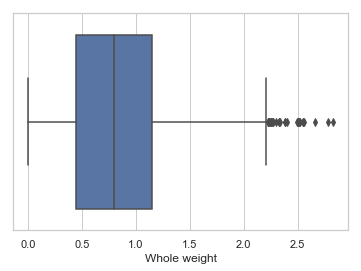

In [10]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Whole weight"])
plt.show()


In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape


Length            0.1650
Diameter          0.1300
Height            0.0500
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Whole weight      0.7115
age               3.0000
dtype: float64


(3781, 9)

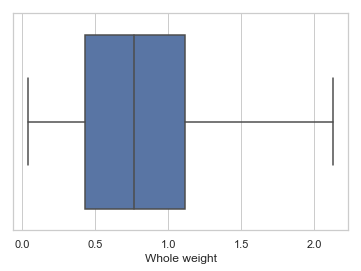

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Whole weight"])
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6FAAE13C8>,
      dtype=object)

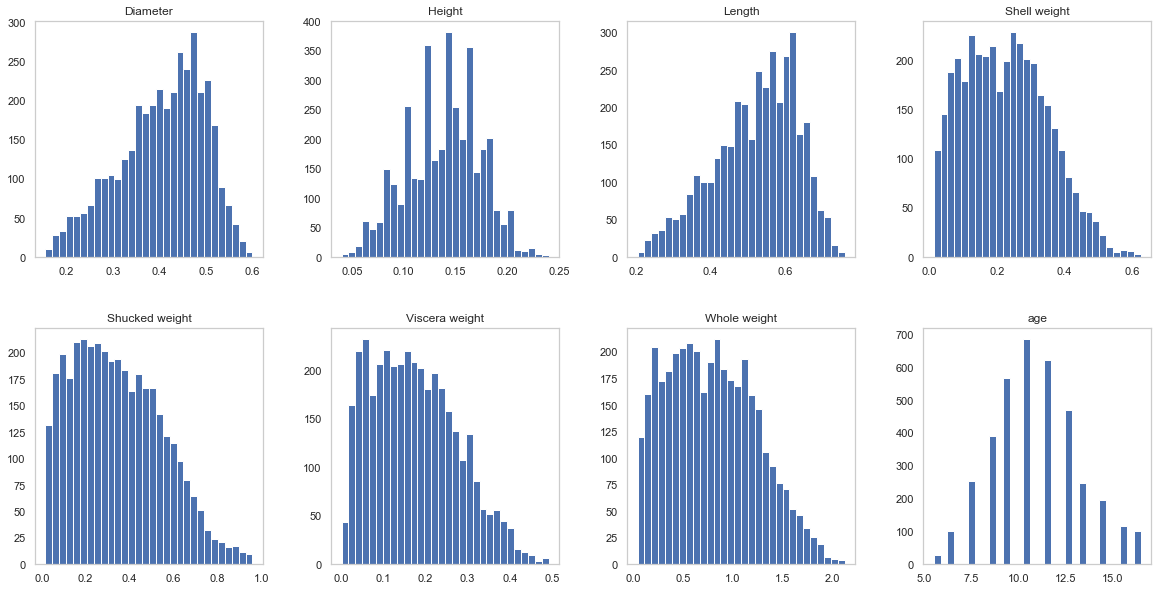

In [13]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

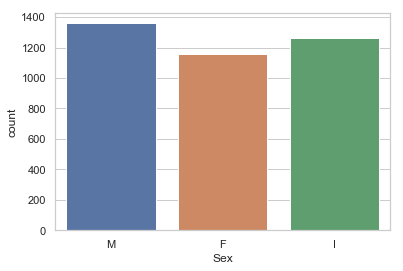

In [14]:
sns.countplot(x = 'Sex', data = data)

In [15]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns
print('numerical_features are:',numerical_features)
print('categorical_features are:',categorical_features)

numerical_features are: Index(['Length', 'Diameter', 'Height', 'Shucked weight', 'Viscera weight',
       'Shell weight', 'Whole weight', 'age'],
      dtype='object')
categorical_features are: Index(['Sex'], dtype='object')


In [16]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
age,0,0.0
Whole weight,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


Note:- 
      - No missing values

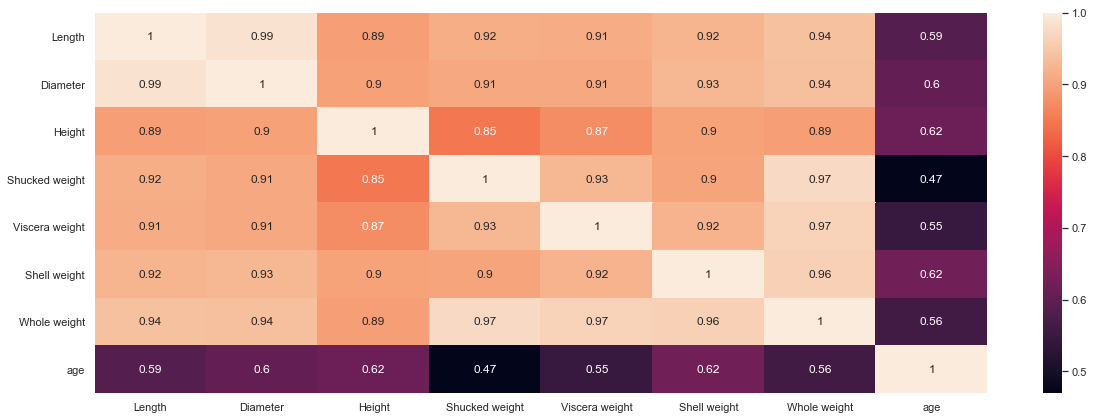

In [17]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

Whole Weight is almost linearly varying with all other features except age
    Height has least linearity with remaining features
    Age is most linearly proprtional with Shell Weight followed by Diameter and length
    Age is least correlated with Shucked Weight


In [18]:
data.corr()

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Whole weight,age
Length,1.000000,0.985969,0.894911,0.916001,0.913637,0.923421,0.940949,0.587108
Diameter,0.985969,1.000000,0.900426,0.909477,0.908181,0.929413,0.938907,0.604331
Height,0.894911,0.900426,1.000000,0.849048,0.874604,0.901294,0.894523,0.615657
Shucked weight,0.916001,0.909477,0.849048,1.000000,0.929280,0.903340,0.973089,0.469503
Viscera weight,0.913637,0.908181,0.874604,0.929280,1.000000,0.923197,0.966545,0.546232
Shell weight,0.923421,0.929413,0.901294,0.903340,0.923197,1.000000,0.962402,0.624113
Whole weight,0.940949,0.938907,0.894523,0.973089,0.966545,0.962402,1.000000,0.561207
age,0.587108,0.604331,0.615657,0.469503,0.546232,0.624113,0.561207,1.000000


Such high correlation coefficients among features can result into multi-collinearity. 

# Data Cleaning


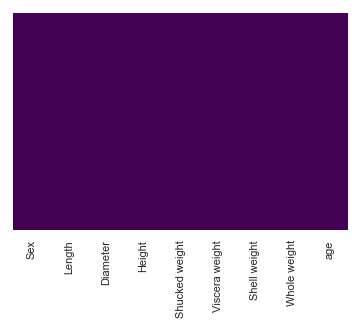

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handling Categorical Data

In [20]:
X = data.drop(['Whole weight'], axis = 1)
y = data['Whole weight']

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 0] = labelencoder_X.fit_transform(X.iloc[:, 0])

In [22]:
X.head()

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.0895,0.0395,0.055,8.5


In [23]:
y.head()

0    0.5140
1    0.2255
2    0.6770
3    0.5160
4    0.2050
Name: Whole weight, dtype: float64

# Model Testing and Training

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Linear Regression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
X_train.head()

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,age
3577,2,0.600,0.475,0.230,0.5220,0.2235,0.360,12.5
2515,0,0.470,0.375,0.120,0.2765,0.1455,0.135,9.5
2570,1,0.465,0.355,0.110,0.2300,0.1005,0.120,8.5
3124,0,0.575,0.450,0.135,0.3620,0.1655,0.236,11.5
3935,2,0.520,0.410,0.115,0.2630,0.1570,0.260,12.5


In [27]:
y_pred = lin_reg.predict(X_test)

In [28]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.03416747806527287

In [29]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.0210251324914956

In [30]:
lin_score=lin_reg.score(X_test,y_test)
lin_score

0.9941500368352278

# Decision Tree Regression

In [31]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [32]:
y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.06209217439834119

In [33]:
tree_score=tree_reg.score(X_test,y_test)
tree_score

0.9806802714480182

# Fine-tune your model

In [34]:
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.06351375 0.06399355 0.07491327 0.06134725 0.05907604 0.07390989
 0.06626966 0.0626079  0.054824   0.08921594]
Mean: 0.06696712451036
Standard deviation: 0.009422938211634849


In [36]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.0482275  0.03419167 0.04057708 0.04422291 0.03594783 0.05743052
 0.04439655 0.04580449 0.03280882 0.0559561 ]
Mean: 0.04395634588723739
Standard deviation: 0.00801650206856905


Note: we specify n_estimators=10 to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

# Random Forest Regression

In [37]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [38]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.039964835979773995

In [39]:
forest_score=forest_reg.score(X_test,y_test)
forest_score

0.9919964372780509

In [40]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.05233761 0.04054479 0.05209126 0.04444283 0.04078578 0.05811929
 0.05006197 0.04650078 0.03796667 0.06720008]
Mean: 0.04900510513818944
Standard deviation: 0.008508464087814489


# SVM REGRESSION

In [41]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.04811615545959348

In [42]:
svm_score=svm_reg.score(X_test,y_test)
svm_score

0.9883986341721249

In [43]:
scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.054813
std       0.005879
min       0.046672
25%       0.051587
50%       0.054629
75%       0.057793
max       0.065266
dtype: float64

# SUMMARY

In [44]:
name = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','SVR']
Scores = [lin_score,tree_score,forest_score,svm_score]
rmse = [lin_rmse,tree_rmse,forest_rmse,svm_rmse]

In [45]:
data = pd.DataFrame(Scores,index=name,columns=['Scores'])
data['RMSE'] = rmse
data = data.reset_index()
data['Model'] = data['index']

In [46]:
data.drop('index',axis=1,inplace=True)
data.head()

,Scores,RMSE,Model
0,0.994150,0.034167,LinearRegression
1,0.980680,0.062092,DecisionTreeRegressor
2,0.991996,0.039965,RandomForestRegressor
3,0.988399,0.048116,SVR


We discover "linear regression" algorithm works better for this specific dataset and
 the "Decision Tree regression" algorithm works the worst for this specific dataset.

# Classification

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

For example, spam detection in email service providers can be identified as a classification problem. This is s binary classification since there are only 2 classes as spam and not spam. A classifier utilizes some training data to understand how given input variables relate to the class. In this case, known spam and non-spam emails have to be used as the training data. When the classifier is trained accurately, it can be used to detect an unknown email.

For this task, I will use K-means clustering, Super Vector Machine and many others.

First I need to divide the target value Age and divide it into young, medium and old.

In [47]:
df = pd.read_csv('abalone.csv')

In [48]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [49]:
df.head(5)

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Whole weight,age
0,M,0.455,0.365,0.095,0.2245,0.1010,0.150,0.5140,16.5
1,M,0.350,0.265,0.090,0.0995,0.0485,0.070,0.2255,8.5
2,F,0.530,0.420,0.135,0.2565,0.1415,0.210,0.6770,10.5
3,M,0.440,0.365,0.125,0.2155,0.1140,0.155,0.5160,11.5
4,I,0.330,0.255,0.080,0.0895,0.0395,0.055,0.2050,8.5


# Making Dummies And Handling Data

In [50]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

In [51]:
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
df.head(5)

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Whole weight,age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.2245,0.1010,0.150,0.5140,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.0995,0.0485,0.070,0.2255,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.2565,0.1415,0.210,0.6770,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.2155,0.1140,0.155,0.5160,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.0895,0.0395,0.055,0.2050,8.5,0.0,1.0,0.0


In [53]:
bins = [0,8,10,df['age'].max()]
group_names = ['young','medium','old']
df['age'] = pd.cut(df['age'],bins, labels = group_names)

In [54]:
dictionary = {'young':0, 'medium':1, 'old':2}
df['age'] = df['age'].map(dictionary)

In [55]:
df.head(10)

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Whole weight,age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.2245,0.1010,0.150,0.5140,2,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.0995,0.0485,0.070,0.2255,1,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.2565,0.1415,0.210,0.6770,2,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.2155,0.1140,0.155,0.5160,2,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.0895,0.0395,0.055,0.2050,1,0.0,1.0,0.0
5,1,0.425,0.300,0.095,0.1410,0.0775,0.120,0.3515,1,0.0,1.0,0.0
6,0,0.530,0.415,0.150,0.2370,0.1415,0.330,0.7775,2,1.0,0.0,0.0
7,0,0.545,0.425,0.125,0.2940,0.1495,0.260,0.7680,2,1.0,0.0,0.0
8,2,0.475,0.370,0.125,0.2165,0.1125,0.165,0.5095,2,0.0,0.0,1.0
9,0,0.550,0.440,0.150,0.3145,0.1510,0.320,0.8945,2,1.0,0.0,0.0


In [56]:
X = df.drop(['age','Sex_0','Sex_1','Sex_2'], axis = 1)
y = df['age']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

# KNN Classifier

The k-Nearest-Neighbors method of classification it is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications. This method is used in areas like recommendation systems, semantic searching, and anomaly detection.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
pred = knn.predict(X_test)

# Predictions and Evaluations

Let's evaluate our KNN model!

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(confusion_matrix(y_test,pred))

[[ 56  49   5]
 [ 35  84  73]
 [  7  70 457]]


In [63]:
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test,pred)
knn_score

0.7141148325358851

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       110
           1       0.41      0.44      0.43       192
           2       0.85      0.86      0.86       534

   micro avg       0.71      0.71      0.71       836
   macro avg       0.61      0.60      0.61       836
weighted avg       0.72      0.71      0.71       836



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [65]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

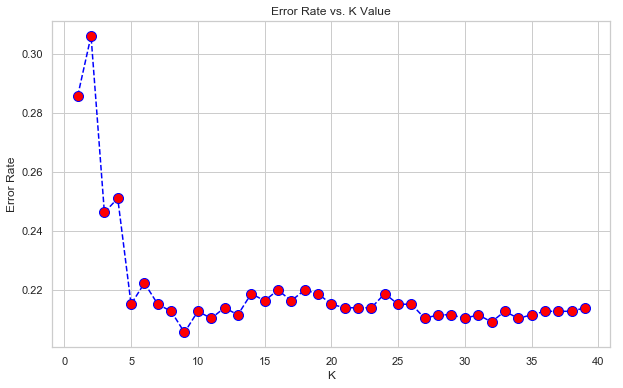

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>27 the error rate just tends to hover around 0.22-0.20 Let's retrain the model with that and check the classification report!

In [67]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 56  49   5]
 [ 35  84  73]
 [  7  70 457]]


              precision    recall  f1-score   support

           0       0.57      0.51      0.54       110
           1       0.41      0.44      0.43       192
           2       0.85      0.86      0.86       534

   micro avg       0.71      0.71      0.71       836
   macro avg       0.61      0.60      0.61       836
weighted avg       0.72      0.71      0.71       836



In [68]:
# NOW WITH K=27
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[ 64  37   9]
 [ 23  89  80]
 [  4  23 507]]


              precision    recall  f1-score   support

           0       0.70      0.58      0.64       110
           1       0.60      0.46      0.52       192
           2       0.85      0.95      0.90       534

   micro avg       0.79      0.79      0.79       836
   macro avg       0.72      0.66      0.69       836
weighted avg       0.77      0.79      0.78       836



# Hyperparameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
print(knn_cv.best_score_," ",knn_cv.best_params_)

0.7857313861623174   {'n_neighbors': 43}


# SVM classifier

The Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. The goal of the model is to output optimal hyperplane that will categorize the data into categories. There are many hyperplanes dividing data possible so the object is to find one that will maximize the distance from the line to the classes.

In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
SVM_score=accuracy_score(y_test,y_pred)
SVM_score

0.784688995215311

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64       110
           1       0.60      0.46      0.52       192
           2       0.85      0.95      0.90       534

   micro avg       0.79      0.79      0.79       836
   macro avg       0.72      0.66      0.69       836
weighted avg       0.77      0.79      0.78       836



# Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [75]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)



In [77]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
NB_score=accuracy_score(y_test,y_pred)
NB_score

0.6985645933014354

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64       110
           1       0.60      0.46      0.52       192
           2       0.85      0.95      0.90       534

   micro avg       0.79      0.79      0.79       836
   macro avg       0.72      0.66      0.69       836
weighted avg       0.77      0.79      0.78       836



# Decision Tree Classifier

The general motive of using Decision Tree is to create a training model which can use to predict class or value of target variables by learning decision rules inferred from prior data(training data). The understanding level of Decision Trees algorithm is so easy compared with other classification algorithms.

In [79]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
DTree_score=accuracy_score(y_test,y_pred)
DTree_score

0.7236842105263158

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64       110
           1       0.60      0.46      0.52       192
           2       0.85      0.95      0.90       534

   micro avg       0.79      0.79      0.79       836
   macro avg       0.72      0.66      0.69       836
weighted avg       0.77      0.79      0.78       836



# Hyperparameter Tuning

In [83]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
print(gsearch.best_score_," ",gsearch.best_params_)

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.752768632146064   {'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4, 'presort': False}


# Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.Logistic Regression is used when the dependent variable (target) is categorical. For example, To predict whether an email is spam (1) or (0)

In [84]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
from sklearn.metrics import accuracy_score
LR_score=accuracy_score(y_test,y_pred)
LR_score

0.4784688995215311

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logisti

Optimal number of features : 8


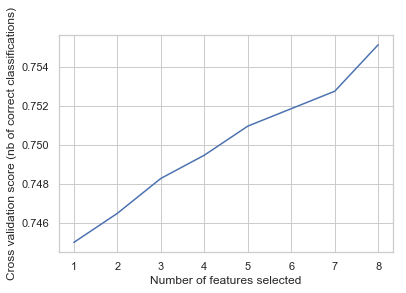

In [86]:
#Find relevant features
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.15      0.16      0.15        96
           1       0.24      0.25      0.24       198
           2       0.64      0.62      0.63       542

   micro avg       0.48      0.48      0.48       836
   macro avg       0.34      0.34      0.34       836
weighted avg       0.49      0.48      0.48       836



# Hyperparameter Tuning

In [88]:
log_clf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The best parameters for using this model is {'C': 10, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.3s finished
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# SUMMARY

In [89]:
name = ['KNN Classifier','SVM Classifier','Naive Bayes Classifier','Decision Tree Classifer','Logistic Regression']
Accuracy = [knn_score,SVM_score,NB_score,DTree_score,LR_score]

In [90]:
data = pd.DataFrame(Accuracy,index=name,columns=['Accuracy'])

data = data.reset_index()
data['Model'] = data['index']

In [91]:
data.drop('index',axis=1,inplace=True)
data.head()

,Accuracy,Model
0,0.714115,KNN Classifier
1,0.784689,SVM Classifier
2,0.698565,Naive Bayes Classifier
3,0.723684,Decision Tree Classifer
4,0.478469,Logistic Regression


We discover "SVM classifier" algorithm works better for this specific dataset.